### Definition of a Signal

A signal is a function of an independent variable such as time, distance, position, or temperature.
Some examples of biomedical signals are electrocardiogram (ECG), electroencephalogram (EEG), magnetoencephalogram (MEG), etc.


There are many different ways signals data may manifest:
* **Continuous**: The domain (X-axis, time) is a continuum (that is, an infinitely uncountable set)
* **Discrete**: The domain (X-axis, time) is discrete
* **Analog**: The amplitude (Y-axis) is continuous
* **Digital**: The amplitude (Y-axis) is discrete

<h3> <center> Examples of Continuous, Discrete and Digital Signals </center> </h3>

<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/signals.png">


In [1]:
# The first time you run in your Colab environment, you will need to clone the repo to Colab (then restart runtime)
! git clone https://github.com/BeaverWorksMedlytics/Week2_public.git

Cloning into 'Week2_public'...
remote: Counting objects: 59, done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 59 (delta 4), reused 12 (delta 4), pack-reused 45
Unpacking objects: 100% (59/59), done.


In [2]:
import os
os.chdir('Week2_public')
os.listdir()

['README.md',
 '01_TimeSeries_Exercise1.ipynb',
 'ecg.txt',
 '02_TimeSeries_Exercise2.ipynb',
 'imgs',
 '00_SIR.ipynb',
 'multiTimeline.csv',
 '.git',
 'sounds',
 '03_SignalsProcessing.ipynb']

#### Exercise

Generate a 5-second random signal and plot it. 

Is the signal continuous or discrete?  Analog or digital?


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

(-1, 1)

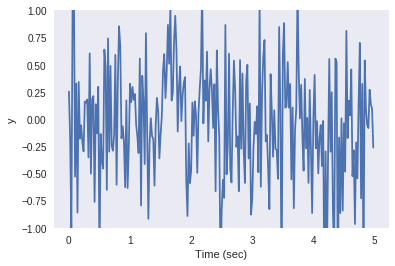

In [13]:
n_sec = 5                         # number of seconds to plot
n_points = 50                     # number of points per second

a = 1                             # amplitude
f = 1                             # one oscillation per second
omega = 2*np.pi*f                 # angular frequency
phi = 0                           # phase

t = np.arange(n_sec*n_points)/n_points    # time axis
y = np.random.normal(scale=0.5, size=len(t))

# PLOT
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.grid()
plt.ylim([-1,1])

### Definition of Frequency 

Frequency is the number of occurrences of a repeating event per unit of time.
The SI (International System of Units) unit of frequency is hertz (symbol Hz, 1 Hz = 1 / second)

### Definition of Amplitude

Amplitude is half the distance between the minimum and maximum values of the range of a periodic function with a bounded range.


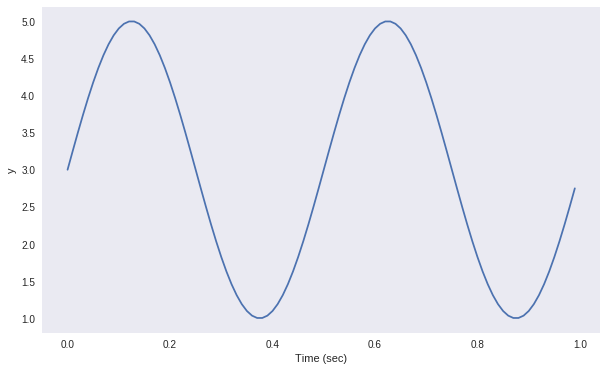

In [14]:
n_sec = 1                         # number of seconds to plot
n_points = 100                    # number of points per second
f = 2                             # oscillations per second

t = np.arange(n_sec*n_points)/n_points    # time axis
y = 3+2*np.sin(2*np.pi*f*t)         # sinusoid

# PLOT
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.grid()

__Question__

Refering the time signal given above, what is the frequency and the amplitude?

__Answer__

Freq: 2 Hz; amp: 2

### ECG Example
The file ecg.txt contains 15000 data points of ECG data, sampled at 1000 Hz.  Let's take a look

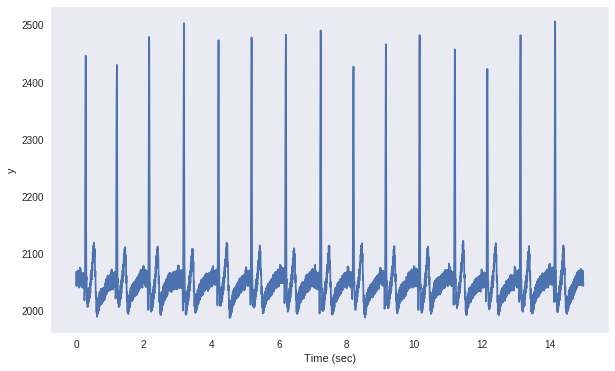

In [15]:
y = np.loadtxt('https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/ecg.txt',skiprows=4)

n_points = len(y)
f = 1000.
n_sec = n_points/f
t = np.arange(0,n_points)/f

# PLOT
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.grid()

__Question__

Estimate frequency and amplitude of the above ECG signal (NOT using code!)

__Answer__

Freq: 1 Hz

__Exercise__

Generate and plot a sinusoidal signal with frequency 0.2 HZ and amplitude of 1.5.

Text(0,0.5,'y')

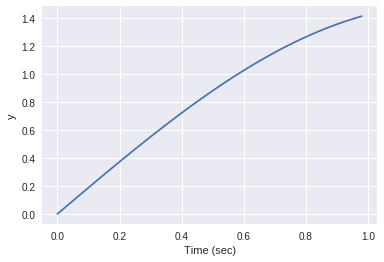

In [25]:
n_sec = 1                         # number of seconds to plot
n_points = 50                   # number of points per second

a = 1.5                             # amplitude
f = .2                             #  oscillation per second
omega = 2*np.pi*f                 # angular frequency
phi = 0                           # phase

t = np.arange(n_sec*n_points)/n_points    # time axis
y = a*np.sin(omega*t + phi)       # sinusoid

# PLOT
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y')

__Exercise__

Now add some random noise to your signal

Text(0,0.5,'y')

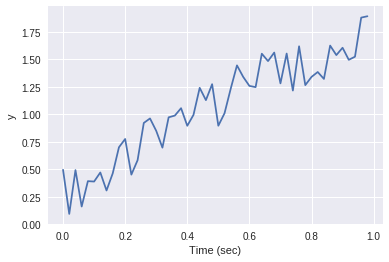

In [22]:
noise = 0.0005*np.asarray(random.sample(range(0,1000),n_points))
y = y + noise

# PLOT
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y')

# Definition of Signal Processing

Signal processing usually refers to:
- Signal generation
- Modifying signals
- Extracting information from signals

Signal processing benefits from improvements in the areas of
electrical engineering, applied mathematics, statistics,
mathematical information technology, ...


### Sampling, Sampling Rate and Sampling Theorem

Sampling is the process of converting a continuous signal to a discrete one.
- Sampling rate, usually denoted by $f_s$, is the number of samples per second *collected* from a continuous signal
- Sampling rate is given in the unit of hertz

#### Nyquist-Shannon Sampling Theorem:

- Fundamental bridge between continuous-time signals and discrete-time signals
- Establishes a sufficient condition for a sample rate that permits a discrete sequence of samples to capture all the information from a continuous-time signal of finite bandwidth

- __The Theorem: "If a function x(t) contains no frequencies higher than B hertz, it is completely determined by giving its ordinates at a series of points spaced 1/(2B) seconds apart"__

- Example: Consider the human hearing sense. The human hearing range is about from 20 Hz to 20 kHz, so the sampling frequency of audio signals must be at least 40 kHz to include all audible frequencies



<h3> <center>  A continuous signal sampled at different frequencies </center> </h3>

<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/sampling.png">


In [0]:
t = np.linspace(0,2,201)
y = np.sin(10*np.pi*t) 

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.ylim([-2,2])

__Exercise__

Wnat is the frequency of the signal above? How many points do you need in your subsample to completely determine the signal? 

__Answer__

((YOUR ANSWER HERE))

In [0]:
t = np.linspace(0,2,201)
y = (4/np.pi)*np.sin(2*np.pi*t) + (4/(3*np.pi))*np.sin(6*np.pi*t)

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.ylim([-2,2])

__Exercise__

How many points do you need in your subsample to completely determine the signal? What frequencies do you have in your signal?

__Answer__

((YOUR ANSWER HERE))

## Aliasing

Aliasing arises when a signal is discretely sampled at a rate that is insuffcient to capture the changes in the signal.

__Example__

Signal composed of a single sinewave at a frequency of 1 Hz 

In [0]:
t = np.linspace(0,4,201)
y = np.cos(2*np.pi*t)

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.ylim([-2,2])

The signal above needs to be sampled at 2 Hz (as dictated by the Nyquist theorem), that is suffcient to capture each peak and trough of the signal:

In [0]:
n_sec = 4
fs = 2

t = np.linspace(0,n_sec,201)              # 201 points from 0--4
t2 = np.linspace(0,n_sec,n_sec*fs+1)

y = np.cos(2*np.pi*t)
y2 = np.cos(2*np.pi*t2)

plt.figure(figsize=(10,6))
plt.plot(t,y,'g')
plt.grid()
plt.xlabel('Time (seconds)')
plt.title('wave(t)')
p2 = plt.stem(t2, y2,'b--')
plt.ylim([-2,2])

If we sample at a frequency higher than this, for example at 3 Hz, then there are more
than enough samples to capture the variations in the signal:

In [0]:
n_sec = 4
fs = 3

t = np.linspace(0,n_sec,201)              
t2 = np.linspace(0,n_sec,n_sec*fs+1)

y = np.cos(2*np.pi*t)
y2 = np.cos(2*np.pi*t2)

plt.figure(figsize=(10,6))
plt.plot(t,y,'g')
plt.grid()
plt.xlabel('Time (seconds)')
plt.title('wave(t)')
plt.ylim([-2,2])
p2 = plt.stem(t2, y2,'b--')

If however we sample at a frequency lower than 2 Hz, for example at 1.5 Hz, then
there are now not enough samples to capture all the peaks and troughs in the signal:

In [0]:
n_sec = 4.
fs = 1.5

t = np.linspace(0,n_sec,201)              
t2 = np.linspace(0,n_sec,n_sec*fs+1)

y = np.cos(2*np.pi*t)
y2 = np.cos(2*np.pi*t2)

plt.figure(figsize=(10,6))
plt.plot(t,y,'g')
plt.xlabel('Time (seconds)')
plt.title('wave(t)')
plt.ylim([-2,2])
p2 = plt.stem(t2, y2,'b--')
plt.grid()

Note here that we are not only losing information, but we are getting the wrong information about the signal. The person receiving these samples, without any previous knowledge of the original signal, may well be mislead into thinking that the signal has quite a different form:

In [0]:
fs3 = 0.5
y3 = np.cos(2*np.pi*fs3*t)

plt.figure(figsize=(10,6))
plt.plot(t,y,'g',label='true signal (1.0 Hz)')
plt.grid()
plt.xlabel('Time (seconds)')
plt.title('wave(t)')
plt.ylim([-2,2])
p2 = plt.stem(t2, y2,'b--')
plt.plot(t,y3,'r',label='false signal (0.5 Hz)')
plt.legend()

Here is another example of two sinusoids aliasing to the same digital signal:

In [0]:
t = np.linspace(0,8,801) # for continuous time signals
n = np.arange(0,9)       # discrete time 

f1 = 0.3
f2 = 1.3

omega1 = 2*np.pi*f1
omega2 = 2*np.pi*f2

y1 = np.cos(omega1*t)
y2 = np.cos(omega2*t)

plt.figure(figsize=(10,6))
plt.plot(t,y1, t,y2)
plt.scatter(n,np.cos(2*np.pi*f1*n),marker='o',s=100)
plt.scatter(n,np.cos(2*np.pi*f2*n),marker='*',s=100)

We see lots of effects of aliasing in real world application
- in movies because continuously varying images are being discretely sampled
- in images due to improper subsampling
- in music, etc. ...

Here is a real-world example: Electricity consumption sampled poorly
- Different sampling makes for different conclusions

<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/aliasing.png">

In conclusion:

<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/batman_nyquist.jpg">

# Digital Signals
As mentioned at the top of this notebook, signals can be discrete in the time-dimension (we just covered this) but also in the amplitude dimension.  

In fact, as soon as a signal is collected by a digital device (like a computer), the signal is digital.  The resolution may be very very small, but it is still finite.  For example, the resolution of a floating point number depends on the [number of bits](http://cstl-csm.semo.edu/xzhang/Class%20Folder/CS280/Workbook_HTML/FLOATING_tut.htm) used to store it:

In [0]:
import numpy as np
import pandas as pd

df = pd.DataFrame(columns=['class','dtype','smallest normal','smallest subnormal','exponent','mantissa'])

# Let's check out different float classes
for f in (np.float16, np.float32, np.float64, float):
    finfo = np.finfo(f)

    df=df.append({'class':'{}'.format(f),
                  'dtype':finfo.dtype,
                  'smallest normal':finfo.tiny, 
                  'smallest subnormal':np.nextafter(f(0), f(1)), 
                  'exponent':finfo.nexp, 
                  'mantissa':finfo.nmant},ignore_index=True)
    
df

Let's look at how digitization can affect the quality of data we collect.

In [0]:
n_sec = 4
fs = 10

digres = 0     # the digital resolution (number of decimal places we can store)

t = np.linspace(0,n_sec,201)

# analog(ish) signal and digital signal
y =            0.8*np.cos(0.5*np.pi*t)
y2 = np.around(0.8*np.cos(0.5*np.pi*t),digres)

plt.figure(figsize=(10,6))
plt.plot(t,y,'g',label='signal')
plt.grid()
plt.xlabel('Time (seconds)')
plt.title('wave(t)')
plt.plot(t, y2,'r',label='digital signal')
plt.ylim([-2,2])
plt.legend()

## Digitized Newts
Let's use one of the sound files from the last notebook and see what happens to the quality of the signal when we discretize and digitize it!

In [0]:
import scipy.io.wavfile
from IPython.display import Audio

# original signal
(sample_rate, input_signal) = scipy.io.wavfile.read("./sounds/newt.wav")
t = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

# signal2: digitize the input
amp_res = 50     # amplitude resolution
digitized_input = np.around(input_signal/amp_res,0)*amp_res

# signal3: sample every N data points
subsample=10      # sample every <subsample> points
t2 = t[::subsample]
digitized_input2 = digitized_input[::subsample]
sample_rate2 = sample_rate/subsample

# Plot
plt.figure(figsize=(20,12))
plt.subplot(3,1,1)
plt.plot(t, input_signal)
plt.title('Newt')
plt.ylabel('amplitude')

plt.subplot(3,1,2)
plt.plot(t, digitized_input)
plt.title('Digitized Newt')
plt.ylabel('amplitude')

plt.subplot(3,1,3)
plt.plot(t2, digitized_input2)
plt.title('Digitized and Subsampled Newt')
plt.xlabel('time (in seconds)')
plt.ylabel('amplitude')



In [0]:
# Original signal
Audio(data=input_signal, rate=sample_rate)

In [0]:
# Digitized signal
Audio(data=digitized_input, rate=sample_rate)


In [0]:
# Digitized and sub-sampled signal
Audio(data=digitized_input2, rate=sample_rate2)